# Переобучение

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
data = pd.read_csv("/home/akimg/Projects/ML_NeighborsClassifier-master/heart.csv", sep=',')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


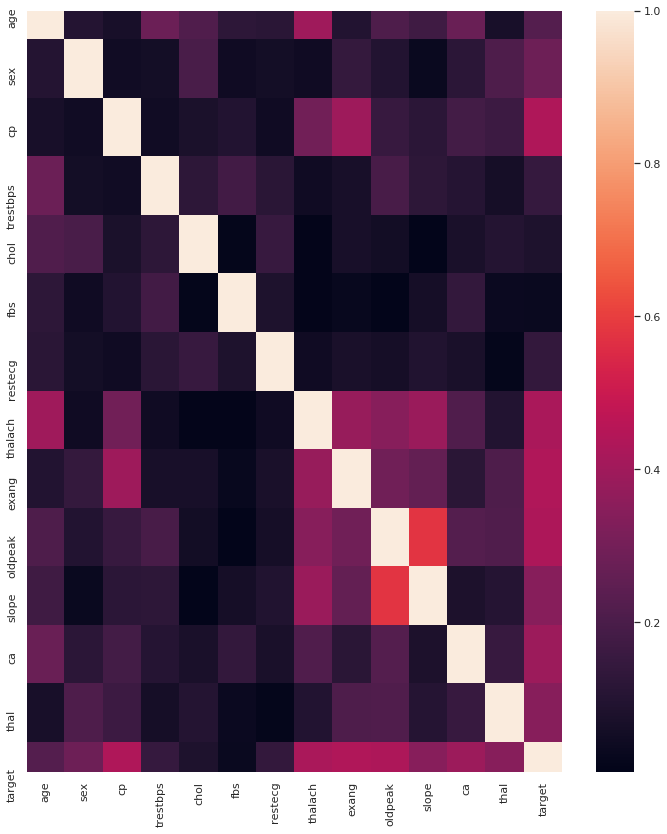

In [3]:
import seaborn as sns

corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [4]:
X = data[data.columns[:-1]]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8421052631578947

# L1 and L2 regularization

In [6]:
from sklearn.linear_model import Ridge
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    L1_lr = LogisticRegression(C=C,penalty="l1").fit(X_train, y_train)
    print("\nL1 train C={:.3f}: {:.4f}".format(C, L1_lr.score(X_train, y_train)))
    print("L1 test  C={:.3f}: {:.4f}".format(C, L1_lr.score(X_test, y_test)))
    print(L1_lr.coef_)
    
for alpha in [0.001, 1, 100]:
    L2_lr =Ridge(alpha=alpha).fit(X_train, y_train)
    print("\nL2 train alpha={:.3f}: {:.4f}".format(alpha, L2_lr.score(X_train, y_train)))
    print("L2 test  alpha={:.3f}: {:.4f}".format(alpha, L2_lr.score(X_test, y_test)))
    print(L2_lr.coef_)


L1 train C=0.001: 0.5419
L1 test  C=0.001: 0.5526
[[0.       0.       0.       0.       0.       0.       0.       0.001133
  0.       0.       0.       0.       0.      ]]

L1 train C=1.000: 0.8590
L1 test  C=1.000: 0.8289
[[ 0.01877527 -1.56667041  0.76250131 -0.02074379 -0.00279389  0.
   0.38564461  0.03006442 -0.58783574 -0.605658    0.52265295 -0.83664338
  -0.53083055]]

L1 train C=100.000: 0.8458
L1 test  C=100.000: 0.8026
[[ 0.00566398 -2.01670363  0.86557412 -0.02899946 -0.00442355 -0.15380946
   0.52575672  0.02163835 -0.80639243 -0.70195282  0.60627384 -0.92535367
  -0.72239905]]

L2 train alpha=0.001: 0.5229
L2 test  alpha=0.001: 0.4760
[ 8.38243111e-04 -2.00247038e-01  1.05493149e-01 -2.61560580e-03
 -1.94084441e-04 -3.03300868e-02  5.88647105e-02  2.53711064e-03
 -1.40173258e-01 -6.99592582e-02  9.24568134e-02 -1.15716125e-01
 -9.53391564e-02]

L2 train alpha=1.000: 0.5229
L2 test  alpha=1.000: 0.4764
[ 8.54637119e-04 -1.96295479e-01  1.05694363e-01 -2.61554684e-03
 -1.

/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
